In [1]:
# Python program to read  image
import cv2
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from scipy.fftpack import dct
from scipy.fftpack import idct
from PIL import Image
import math

img_path = 'C:\\Users\\carot\\Downloads\\img.jpg'

originalImage = cv2.imread(img_path, 0)

img=mpimg.imread(img_path)
imgplot = plt.imshow(img)
plt.show()

<Figure size 640x480 with 1 Axes>

In [2]:
block = originalImage[:8,:8]
print(block)

[[115 112 112 112 108 100  96  98]
 [113 110 109 110 107 100  97  99]
 [100  98  97  98  96  92  90  92]
 [ 86  84  83  85  85  84  85  87]
 [ 86  84  84  86  89  91  93  94]
 [ 98  97  97 100 103 107 108 109]
 [116 115 115 117 121 124 125 124]
 [131 130 130 131 135 137 137 135]]


In [3]:
offSet = np.full((8,8),128)
f = np.subtract(block, offSet)
print(f)

[[-13 -16 -16 -16 -20 -28 -32 -30]
 [-15 -18 -19 -18 -21 -28 -31 -29]
 [-28 -30 -31 -30 -32 -36 -38 -36]
 [-42 -44 -45 -43 -43 -44 -43 -41]
 [-42 -44 -44 -42 -39 -37 -35 -34]
 [-30 -31 -31 -28 -25 -21 -20 -19]
 [-12 -13 -13 -11  -7  -4  -3  -4]
 [  3   2   2   3   7   9   9   7]]


In [4]:
tmp = dct(f, type=2 ,norm='ortho').transpose()
T = dct(tmp, type=2 ,norm='ortho').transpose()

np.printoptions(suppress=True,precision=10)
np.set_printoptions(formatter={'float': '{: 0.1f}'.format})
print(T)

[[-187.9  0.1 -0.1  2.9  5.4 -0.1  0.2  0.0]
 [-59.9  30.5 -4.5 -5.0  5.6 -0.5  0.2 -0.2]
 [ 101.9  12.0 -4.4  0.2  0.3 -0.3  0.3  0.6]
 [-15.0 -4.9  0.5  0.1 -0.1  0.2  0.4 -0.2]
 [-9.9  0.2  0.4 -0.1 -0.1  0.2 -0.0  0.6]
 [-7.5  0.2  0.1 -0.5 -0.1  0.1 -0.1 -0.2]
 [ 0.1  0.5 -0.5 -0.3 -0.3 -0.2  0.4 -0.4]
 [ 0.3  0.1 -0.2  0.3 -0.4 -0.0  0.1  0.4]]


In [5]:
def new_q(quality_level):
    Qmatrix=np.matrix( [[16,11,10,16,24,40,51,61],
                        [12,12,14,19,26,58,60,55],
                        [14,13,16,24,40,57,69,56],
                        [14,17,22,29,51,87,80,62],
                        [18,22,37,56,68,109,103,77],
                        [24,35,55,64,81,104,113,92],
                        [49,64,78,87,103,121,120,101],
                        [72,92,95,98,112,100,103,99]])
    Qmatrix = Qmatrix.astype(float)
    if quality_level>50:
        new_QM = Qmatrix*((100-quality_level)/50.0)
    else:
        new_QM = Qmatrix*(50/quality_level)
        
    for i in range(8):
        for j in range(8):
            if new_QM[i,j]<1:
                new_QM[i,j] = 1
            elif new_QM[i,j]>255:
                new_QM[i,j] = 255
    return new_QM.astype(int)

In [6]:
C = T / new_q(50)
np.around(C,0,C)
print(C.astype(int))

[[-12   0   0   0   0   0   0   0]
 [ -5   3   0   0   0   0   0   0]
 [  7   1   0   0   0   0   0   0]
 [ -1   0   0   0   0   0   0   0]
 [ -1   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0]]


In [7]:
def zigzag(a):
    return np.concatenate([np.diagonal(a[::-1,:], k)[::(2*(k % 2)-1)] for k in range(1-a.shape[0], a.shape[0])])    

In [8]:
z = zigzag(C).astype(int)
print('[', end='')
for i in range(64):
    if i<63:
        print(z[i], end=', ')
    else:
        print(z[i], end='')
print(']')

[-12, 0, -5, 7, 3, 0, 0, 0, 1, -1, -1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]


In [9]:
R = np.multiply(new_q(50),C)
print(R.astype(int))

[[-192    0    0    0    0    0    0    0]
 [ -60   36    0    0    0    0    0    0]
 [  98   13    0    0    0    0    0    0]
 [ -14    0    0    0    0    0    0    0]
 [ -18    0    0    0    0    0    0    0]
 [   0    0    0    0    0    0    0    0]
 [   0    0    0    0    0    0    0    0]
 [   0    0    0    0    0    0    0    0]]


In [10]:
idct1 = dct(R, type=2 ,norm='ortho').transpose()
idct2 = dct(idct1, type=2 ,norm='ortho').transpose()
N = np.around(np.add(idct2, offSet), 0)
print(N.astype(int))

[[111 103 101  99  99 101 107 117]
 [102  91  89  88  89  93 102 114]
 [ 93  79  81  84  90  97 106 117]
 [ 81  64  69  78  88  99 109 119]
 [ 89  75  82  91 101 111 118 124]
 [118 115 119 124 129 133 133 131]
 [139 144 146 147 147 145 141 135]
 [139 144 144 144 143 140 137 133]]


In [11]:
print(np.subtract(block,N).astype(int))

[[  4   9  11  13   9  -1 -11 -19]
 [ 11  19  20  22  18   7  -5 -15]
 [  7  19  16  14   6  -5 -16 -25]
 [  5  20  14   7  -3 -15 -24 -32]
 [ -3   9   2  -5 -12 -20 -25 -30]
 [-20 -18 -22 -24 -26 -26 -25 -22]
 [-23 -29 -31 -30 -26 -21 -16 -11]
 [ -8 -14 -14 -13  -8  -3   0   2]]


[[111 103 101  99  99 101 107 117]
 [102  91  89  88  89  93 102 114]
 [ 93  79  81  84  90  97 106 117]
 [ 81  64  69  78  88  99 109 119]
 [ 89  75  82  91 101 111 118 124]
 [118 115 119 124 129 133 133 131]
 [139 144 146 147 147 145 141 135]
 [139 144 144 144 143 140 137 133]]


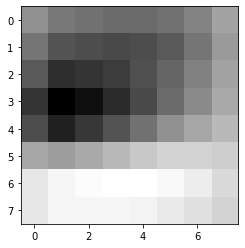

In [13]:
print(matrix_img)
plt.imshow(matrix_img, 'gray')
plt.show()

[[115 112 112 112 108 100  96  98]
 [113 110 109 110 107 100  97  99]
 [100  98  97  98  96  92  90  92]
 [ 86  84  83  85  85  84  85  87]
 [ 86  84  84  86  89  91  93  94]
 [ 98  97  97 100 103 107 108 109]
 [116 115 115 117 121 124 125 124]
 [131 130 130 131 135 137 137 135]]


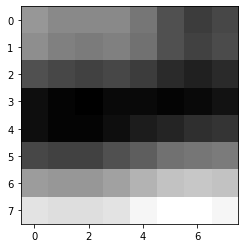

In [18]:
%matplotlib inline 
print(block)
plt.imshow(block, 'gray')
plt.show()